<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Преамбула" data-toc-modified-id="Преамбула-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Преамбула</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модель-DummyClassifier" data-toc-modified-id="Модель-DummyClassifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модель DummyClassifier</a></span></li><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель LogisticRegression</a></span><ul class="toc-item"><li><span><a href="#Без-балансировки" data-toc-modified-id="Без-балансировки-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Без балансировки</a></span></li><li><span><a href="#Балансировка-с-увеличением-классов" data-toc-modified-id="Балансировка-с-увеличением-классов-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Балансировка с увеличением классов</a></span></li><li><span><a href="#Балансировка-с-уменьшением-классов" data-toc-modified-id="Балансировка-с-уменьшением-классов-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Балансировка с уменьшением классов</a></span></li></ul></li><li><span><a href="#Модель-LGBMClassifier" data-toc-modified-id="Модель-LGBMClassifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Модель LGBMClassifier</a></span><ul class="toc-item"><li><span><a href="#Без-балансировки" data-toc-modified-id="Без-балансировки-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Без балансировки</a></span></li><li><span><a href="#is_unbalance=True" data-toc-modified-id="is_unbalance=True-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>is_unbalance=True</a></span></li><li><span><a href="#Балансировка-с-увеличением-классов" data-toc-modified-id="Балансировка-с-увеличением-классов-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Балансировка с увеличением классов</a></span></li><li><span><a href="#Балансировка-с-уменьшением-классов" data-toc-modified-id="Балансировка-с-уменьшением-классов-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Балансировка с уменьшением классов</a></span></li><li><span><a href="#Результаты-обучения:" data-toc-modified-id="Результаты-обучения:-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Результаты обучения:</a></span></li></ul></li><li><span><a href="#Вывод--по-разделу" data-toc-modified-id="Вывод--по-разделу-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод  по разделу</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Описание проекта

Интернет-магазин запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

**Цель:** Обучить модель классифицировать комментарии на позитивные и негативные.

**Метрика качества:** $\text{F1} >= 0.75$. 


**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Преамбула

<font color='red'>**Важно!!!**</font>


Обучение моделей - это мучительно-длительный процесс. Поэтому в рамках проекта обучение проводилось один раз, затем тип ячеек с кодом обучения менялся на RAW, а найденные лучшие гиперпараметры записывались в виде словаря в ячейке ниже, там же выводились результаты после обучения.

## Подготовка

In [1]:
!pip install imbalanced-learn==0.8.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords as nltk_stopwords

from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, recall_score
from sklearn.dummy import DummyClassifier

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

import spacy

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier

from tqdm.auto import tqdm

import warnings
import os
import re

import multiprocessing

In [3]:
RANDOM_STATE = 100

warnings.filterwarnings('ignore')

tqdm.pandas()

nlp = spacy.load('en_core_web_sm')

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(nltk_stopwords.words("english"))

cpu_use = multiprocessing.cpu_count() - 1

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
p = '/datasets/toxic_comments.csv'
try:
    df = pd.read_csv(p)
except:
    df = pd.read_csv(p[1:])

In [5]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.9+ MB


In [6]:
df.head(10)

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
5,5,"""\n\nCongratulations from me as well, use the ...",0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,Your vandalism to the Matt Shirvington article...,0
8,8,Sorry if the word 'nonsense' was offensive to ...,0
9,9,alignment on this subject and which are contra...,0


При сохранении датасета кроме данных выгрузили индексы в первой (или нулевой, если брать индексацию питона, а не "человеческую") колонке. Они нам не нужны - удалим их.

In [7]:
display(f'Колонки ДО удаления: {df.columns.to_list()}')

df = df.drop(columns=df.columns[0])

display(f'Колонки ПОСЛЕ удаления: {df.columns.to_list()}')

"Колонки ДО удаления: ['Unnamed: 0', 'text', 'toxic']"

"Колонки ПОСЛЕ удаления: ['text', 'toxic']"

Задача на бинарную классификацию, проверим что признак `toxic` имеет только два значения:

In [8]:
df['toxic'].value_counts(normalize=True)

0    0.898388
1    0.101612
Name: toxic, dtype: float64

Признак `toxic`, тип `int`, 2 значения - `0` и `1`.  

Наша задача: найти токсичные комментарии, при этом если позитивный комментарий ошибочно отправится на модерацию и  "чуть" позже появится на странице - небольшая беда и это намного лучше, чем если токсичный комментарий попадет на страницу описания товаров. 

Для выполнения задачи нам необходимо текстовые данные сначала токенезировать/лемматизироватью В рамках этой задачи мы испытаем две разные библиотеки `nltk` (лемматизация с учетом позиции слова в предложении и без этого)  и `spacy` (лемматизация с учетом позиции слова всего корпуса и лемматизация с учетом позиции слова в конвейере батчами) измерив время  работы каждого способа. После обучения модели LigistciRegression мы проверим качество на каждом варианте лемматизации.

Протестируем разные библиотеки и подходы к лемматизации текстов:

Время, затраченное на лемматизацию с использованием библиотеки/метода:

In [9]:
df_time_lemma = pd.DataFrame({'library': ['nltk', 'nltk', 'spacy', 'spacy', 'spacy'],
                              'method': ['lemma_no_POS', 'lemma_with_POS', 'lemma_spacy_with_POS', 'lemma_spacy_pipe_with_POS', 
                                         'lemma_spacy_pipe_no_POS'],
                              'time': ['0:03:37', '0:29:17', '1:03:29', '0:23:22', '0:12:38'],
                              'speed': ['733.11it/s', '90.63it/s', '41.81it/s', '113.62it/s', '210.01it/s'],
                              'remark': ['', '', '', 'nlp.pipe(batch_size=64, n_process=-1, disable=["parser", "ner"])', 
                                         'nlp.pipe( batch_size=64, n_process=-1, disable=["tagger", "parser", "ner"])']
                             })
df_time_lemma['time'] = pd.to_datetime(df_time_lemma['time']).dt.time
with pd.option_context('max_colwidth', None):
    display(df_time_lemma.sort_values(by='time'))

,library,method,time,speed,remark
0,nltk,lemma_no_POS,00:03:37,733.11it/s,
4,spacy,lemma_spacy_pipe_no_POS,00:12:38,210.01it/s,"nlp.pipe( batch_size=64, n_process=-1, disable=[""tagger"", ""parser"", ""ner""])"
3,spacy,lemma_spacy_pipe_with_POS,00:23:22,113.62it/s,"nlp.pipe(batch_size=64, n_process=-1, disable=[""parser"", ""ner""])"
1,nltk,lemma_with_POS,00:29:17,90.63it/s,
2,spacy,lemma_spacy_with_POS,01:03:29,41.81it/s,


При использование `nltk` отказ от POS (теггирование, для определения части речи) позволяет ускориться на ~ в 10 раз - этот способ самый быстрый из всех.

При использование `spacy` конвейер ускорил процесс всего в ~3 раза, в случае отказа от POS между вариантами с конвейером ускорение  в ~2 раза.

Разница по времени между`spacy с POS в конвейере` и `nltk с POS` не существенная.

Сравним качество лемматизаторов взяв "из коробки" LogisticRegression:

In [10]:
lemma_file = 'datasets/toxic_comments_lemmas.csv'

if os.path.exists(lemma_file):
    print('Загрузка файла с леммами')
    df = pd.read_csv(lemma_file)
else:
    df['lemma'] = df['text'].str.lower().progress_apply(lambda x: ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) 
                                                                            for w in nltk.word_tokenize(x)]))
    # Сохраним датасет в файл, что бы повторно не лематизировать, а загружать датасет из файла
    df.to_csv('datasets/toxic_comments_lemmas.csv', index=False)

Загрузка файла с леммами


In [11]:
l_cols = l_cols = ['lemma_no_POS', 'lemma_with_POS', 'lemma_spacy_with_POS', 'lemma_spacy_pipe_with_POS', 
                   'lemma_spacy_pipe_no_POS']

l_f1 = []
l_tpr = []

if sklearn.__version__.split('.')[0] == '1':
    stop_words = list(stop_words)

for col in l_cols:
    print('Column:', col)
    x_train, x_test, y_train, y_test = train_test_split(df[col], df['toxic'], test_size=.2, stratify=df['toxic'], 
                                                        random_state=RANDOM_STATE)

    x_train2, x_valid, y_train2, y_valid = train_test_split(x_train, y_train, test_size = 0.2, 
                                                      stratify=y_train, random_state=RANDOM_STATE)

    est = LogisticRegression(random_state=RANDOM_STATE, verbose=0)
    tfidfv = TfidfVectorizer(stop_words=stop_words)
    lr_lemma = Pipeline([('tfidfv', tfidfv),('est',est)])

    lr_lemma.fit(x_train2, y_train2)

    predict = lr_lemma.predict(x_valid)
    l_f1.append(f1_score(y_valid, predict))
    l_tpr.append(recall_score(y_valid, predict))

count_toxic = df[df['toxic'] == 1].shape[0]
df_test_lemm = pd.DataFrame({'col': l_cols, 
                             'time lemmatize': ['0:03:37', '0:29:17', '1:03:29', '0:23:22', '0:12:38'], 
                             'f1': l_f1, 'tpr': l_tpr})
df_test_lemm = df_test_lemm.sort_values(by='f1', ascending=False).reset_index()


df_test_lemm = df_test_lemm.sort_values(by='f1', ascending=False).reset_index(drop=True)
df_test_lemm['count_toxic'] = count_toxic
df_test_lemm['detection_count_toxic'] = round(df_test_lemm['count_toxic'] * df_test_lemm['tpr'], 0)
df_test_lemm['diff_with_best'] = 0
for i in range(1, len(df_test_lemm)):
    df_test_lemm.loc[i, 'diff_with_best'] = df_test_lemm.loc[0, 'detection_count_toxic'] - df_test_lemm.loc[i, 'detection_count_toxic']
display(df_test_lemm)    

Column: lemma_no_POS
Column: lemma_with_POS
Column: lemma_spacy_with_POS
Column: lemma_spacy_pipe_with_POS
Column: lemma_spacy_pipe_no_POS


,index,col,time lemmatize,f1,tpr,count_toxic,detection_count_toxic,diff_with_best
0,2,lemma_spacy_with_POS,1:03:29,0.710763,0.578764,16186,9368.0,0.0
1,3,lemma_spacy_pipe_with_POS,0:23:22,0.710763,0.578764,16186,9368.0,0.0
2,1,lemma_with_POS,0:29:17,0.706190,0.572587,16186,9268.0,100.0
3,0,lemma_no_POS,0:03:37,0.704077,0.566795,16186,9174.0,194.0
4,4,lemma_spacy_pipe_no_POS,0:12:38,0.696325,0.555985,16186,8999.0,369.0


Разница в цифрах настолько незначительная, что использование `nltk без POS` является лучшим вариантом  учитывать возможность переобучения модели в будущем на новой порции данных,  а значит новой подготовки данных. В дальнейшем будем использовать эту колонку.

Данные готовые, векторизовать применяя TF-IDF, будем уже на тренировочной выборке.

### Вывод по разделу

Что сделано: 
- загрузили файл, удалили лишнюю колонку
- проверили пропуски - их нет, целевой признак определяет 2 класса: 0 и 1.
- выявили дисбаланс - объектов класса, которые мы должны научится определять "1" намного меньше чем "0".
- токенезировали/лемматизировали наш датасет ( это не является утечкой/протечкой данных) используя разные подходы. Лучший результат по совокупности показала `nltk` без POS

## Обучение

Разделим наш датасет на тренировочную и тестовую выборки, закодируем векторное представление текстов:

In [12]:
df_res = {}  # для хранения результатов обучения

RANDOM_STATE = 100

x_train, x_test, y_train, y_test = train_test_split(df['lemma_no_POS'], df['toxic'], test_size = 0.2, 
                                                    random_state=RANDOM_STATE, stratify=df['toxic'])

print(x_train.shape)

(127433,)


У нас уже указано значение целевой метрики: F1 >=  0.75. Поверим, может dummy модель позволит нам достичь этой метрики

### Модель DummyClassifier

In [13]:
dummy_model = DummyClassifier(strategy='stratified', random_state=RANDOM_STATE)
dummy_model.fit(x_train, y_train)
dummy_predict = dummy_model.predict(x_train)

f1 = f1_score(y_train, dummy_predict)
display(f'F1 score DummyClassifier = {f1}')

'F1 score DummyClassifier = 0.0967392984082831'

DummyClassifier нас не устраивает, так же мы не будем с ним сравнивать другие модели, т.к. целевое значение метрики не достигнуто.

Для повышения качества модели будем использовать подбор гиперпараметров с применением cross-validation, для устранения утечки информации из тренировочного этапа в валидационный будем использовать конвейер для векторизации текста-обучения-валидации.

### Модель LogisticRegression

In [14]:
logreg_parameters = {
    'tfidf__max_df': [.25, .5, 0.75],
    'logreg__C': [1, 5, 10, 20, 30, 35, 40]
}

#### Без балансировки

#### Балансировка с увеличением классов

#### Балансировка с уменьшением классов

### Модель LGBMClassifier

In [15]:
lgbm_parameters = {
    'tfidf__max_df': [.5, 0.75],
    'lgbm__n_estimators': [400, 600],
    'lgbm__max_depth':  [25, 31],
}

#### Без балансировки

#### is_unbalance=True

#### Балансировка с увеличением классов

#### Балансировка с уменьшением классов

#### Результаты обучения:

In [16]:
d_temp = {'model': {0: 'LogisticRegression',
  1: 'RandomOverSampler->LogisticRegression',
  2: 'RandomUnderSampler->LogisticRegression',
  3: 'LGBMClassifier',
  4: 'LGBMClassifier(is_unbalance=True)',
  5: 'RandomOverSampler->LGBMClassifier',
  6: 'RandomUnderSampler->LGBMClassifier'},
 'f1': {0: 0.7722946206292861,
  1: 0.7621987840121163,
  2: 0.6888629372620342,
  3: 0.7812506222406077,
  4: 0.7717331309580369,
  5: 0.7771893889354047,
  6: 0.6998634282885164},
 'best_params': {0: {'logreg__C': 30, 'tfidf__max_df': 0.5},
  1: {'logreg__C': 35, 'tfidf__max_df': 0.75},
  2: {'logreg__C': 5, 'tfidf__max_df': 0.5},
  3: {'lgbm__max_depth': 25, 'lgbm__n_estimators': 400, 'tfidf__max_df': 0.75},
  4: {'lgbm__max_depth': 25, 'lgbm__n_estimators': 600, 'tfidf__max_df': 0.75},
  5: {'lgbm__max_depth': 25, 'lgbm__n_estimators': 600, 'tfidf__max_df': 0.75},
  6: {'lgbm__max_depth': 31,
   'lgbm__n_estimators': 400,
   'tfidf__max_df': 0.75}}}

with pd.option_context('max_colwidth', None):
    display(pd.DataFrame.from_dict(d_temp).sort_values(by='f1', ascending=False))

,model,f1,best_params
3,LGBMClassifier,0.781251,"{'lgbm__max_depth': 25, 'lgbm__n_estimators': 400, 'tfidf__max_df': 0.75}"
5,RandomOverSampler->LGBMClassifier,0.777189,"{'lgbm__max_depth': 25, 'lgbm__n_estimators': 600, 'tfidf__max_df': 0.75}"
0,LogisticRegression,0.772295,"{'logreg__C': 30, 'tfidf__max_df': 0.5}"
4,LGBMClassifier(is_unbalance=True),0.771733,"{'lgbm__max_depth': 25, 'lgbm__n_estimators': 600, 'tfidf__max_df': 0.75}"
1,RandomOverSampler->LogisticRegression,0.762199,"{'logreg__C': 35, 'tfidf__max_df': 0.75}"
6,RandomUnderSampler->LGBMClassifier,0.699863,"{'lgbm__max_depth': 31, 'lgbm__n_estimators': 400, 'tfidf__max_df': 0.75}"
2,RandomUnderSampler->LogisticRegression,0.688863,"{'logreg__C': 5, 'tfidf__max_df': 0.5}"


### Вывод  по разделу

Модель LogisticRegression была лучше, пока кол-во деревьев в  LGBMClassifier было меньше 400. В наших данных дисбаланс классов. Как пишет автор -  https://alexanderdyakonov.wordpress.com/2021/05/27/imbalance/ -  при использование в качестве  функции ошибки LogLoss, то балансировка не нужна: "...Если используется LogLoss, то каких-то «танцев с перебалансировкой» делать не только не нужно, но и недопустимо, поскольку это делает решение (алгоритм) неоткалиброванным. ...". Классы, которые мы использовали по дефолту используют как раз LogLoss. Но народня мудрость гласит "доверяй, но проверяй". Проверили встроенными возможностями, а так же с помощью ibmlearn - результат отрицательный, т.е. ни один из способов не был лучше варианта "без борьбы с дисбалансом".

Лучшая модель: LGBMClassifier с параметрами {'lgbm__max_depth': 25, 'lgbm__n_estimators': 400, 'tfidf__max_df': 0.75} достигла 'f1' = 0.781251

## Тестирование

In [17]:
tfidfv = TfidfVectorizer(max_df=0.75, stop_words=stop_words)
est = LGBMClassifier(random_state=RANDOM_STATE, max_depth=25, n_estimators=400)
model = Pipeline([('tfidfv', tfidfv),('est',est)])
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
f1 = f1_score(y_test, y_predict)
display(f'F1 score = {f1}')

'F1 score = 0.771532973725422'

AUC: 0.966


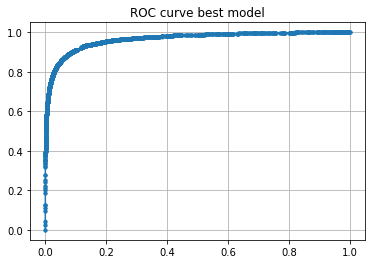

In [18]:
proba = model.predict_proba(x_test)
proba = proba[:, 1]
auc = roc_auc_score(y_test, proba)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, proba)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC curve best model')
plt.grid()
plt.show()

## Выводы

Цель работы: разработка модели для оценки "токсичности" текстов. Целевая метрика качества: `F1` не меньше 0.75. 
    
Датасет содержит ~160 тыс. размеченных текстов, из-них примерено ~10% - "токсичных".

Для борьбы с дисбалансом, воспользовались встроенными возможностями, а так же с `ibmlearn`

Для токенизации и лемматизации текстов применялись библиотеки `nltk` и `spcy` с учетом без слова в предложении, для определения части речи. 
Самый быстрый вариант `nltk without POS`. Для векторного представления текстов использовался класс `TfidfVectorizer`.

В обучении использовался стандартными`Pipeline` и `Pipeline` из `imblearn`, `HalvingGridSearchCV` для кросс-валидации и подбора гиперпараметров.

Обучили модели на основе классов:
- LogisticRegression
- LGBMClassifier

Модели на основе деревьев обучались очень долго. 

Победила модель `LGBMClassifier` без применения средств борьбы с дисбалансом, F1-score:
- на обучении 0.781251
- на тестирование 0.77153